# Lib Prep.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pandas_profiling import ProfileReport
import time
import warnings
warnings.simplefilter('ignore')

pd.options.display.float_format = '{:,.2f}'.format

# Data Prep

In [2]:
BASE_DIR = 'data/'
INPUT_FILE = ''

In [3]:
data = pd.read_csv(f'{BASE_DIR}{INPUT_FILE}')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# get (initial) instant data report
initial_report = ProfileReport(data, minimal=True)
initial_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Filtering

In [6]:
# filter 1
data.drop(columns=['id', 'member_id', 'Unnamed: 0', 'url', 'policy_code', 'application_type', 'url',
                   'desc', 'zip_code'], inplace=True)

# filter 2: remove missing vals
for col in data.columns:
  if data[col].isnull().sum() == data.shape[0]:
    data.drop(columns=col, inplace=True)

## Fixing Datetime Datatype

In [7]:
# get datetime columns
date_cols = data[[col for col in data.columns if col.endswith('_d')]+['earliest_cr_line']]

# fixing
for col in date_cols:
  data[col] = pd.to_datetime(data[col], format='%b-%y')

# check result
display(data.head(3))
data.info()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,"4,975.00",36 months,10.65,162.87,B,B2,NaN,10+ years,...,2015-01-01,171.62,NaT,2016-01-01,0.00,NaN,0.00,NaN,NaN,NaN
1,2500,2500,"2,500.00",60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,2013-04-01,119.66,NaT,2013-09-01,0.00,NaN,0.00,NaN,NaN,NaN
2,2400,2400,"2,400.00",36 months,15.96,84.33,C,C5,NaN,10+ years,...,2014-06-01,649.91,NaT,2016-01-01,0.00,NaN,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  int64         
 1   funded_amnt                  466285 non-null  int64         
 2   funded_amnt_inv              466285 non-null  float64       
 3   term                         466285 non-null  object        
 4   int_rate                     466285 non-null  float64       
 5   installment                  466285 non-null  float64       
 6   grade                        466285 non-null  object        
 7   sub_grade                    466285 non-null  object        
 8   emp_title                    438697 non-null  object        
 9   emp_length                   445277 non-null  object        
 10  home_ownership               466285 non-null  object        
 11  annual_inc                

## Refine Class

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

(463536, 50)


1. Good      39.85
2. Current   48.37
3. Late       2.43
4. Bad        9.34
Name: loan_status, dtype: float64

1. Good       184739
2. Current    224226
3. Late        11264
4. Bad         43307
Name: loan_status, dtype: int64

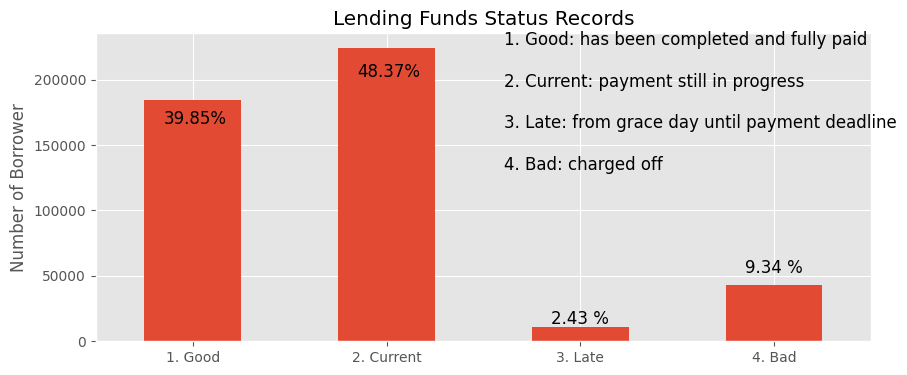

In [8]:
display(data['loan_status'].value_counts())

# Convert Loan Status to Class
status_cat = {
  'Current'           : '2. Current',         
  'Fully Paid'        : '1. Good',
  'Charged Off'       : '4. Bad',
  'Late (31-120 days)': '3. Late',
  'In Grace Period'   : '3. Late',
  'Does not meet the credit policy. Status:Fully Paid': '',
  'Late (16-30 days)' : '3. Late',
  'Default'           : '4. Bad',
  'Does not meet the credit policy. Status:Charged Off': ''
}

data2 = data.copy()
data2 = data2[data2['loan_status'] != ('Does not meet the credit policy. Status:Fully Paid') ] 
data2 = data2[data2['loan_status'] != ('Does not meet the credit policy. Status:Charged Off') ]
data2.loan_status.replace(status_cat, inplace=True)
print(data2.shape)

# class comparison
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(10,4))
data2.loan_status.value_counts().sort_index().plot.bar(rot=0, title='Lending Funds Status Records', ax=ax)
for i in ax.patches:  
  y_h = i.get_height()*.9
  if i.get_height()<100000:
    y_h = i.get_height()*1.2
  ax.text(i.get_x()+.1, y_h,
              '{:^5}%'.format(round((i.get_height()/data2.shape[0])*100, 2)), 
              fontsize=12, color='k') 
lbl = list(data2.loan_status.value_counts().sort_index()/data2.shape[0])
plt.text(1.5, 115000, 
    '''
    1. Good: has been completed and fully paid

    2. Current: payment still in progress

    3. Late: from grace day until payment deadline

    4. Bad: charged off
    ''',
    fontsize=12.
)
plt.ylabel('Number of Borrower')

display(data2.loan_status.value_counts().sort_index()/data2.shape[0]*100)
display(data2.loan_status.value_counts().sort_index())

In [9]:
cc = pd.DataFrame(data2.loan_status.value_counts().sort_index().reset_index())
cc.sum()

index          1. Good2. Current3. Late4. Bad
loan_status                            463536
dtype: object

In [10]:
# total fund
print(data2.loan_amnt.sum())

# avg accepted loan per day
total_weekday_per_year = 260
print(data2.loan_amnt.count()/total_weekday_per_year*5)

6651081325
8914.153846153846


## Business Understanding

### BU 1  

Condition of Customers and Funds

issue_d_y
2007   19,255.64
2008   19,951.33
2009   20,280.45
2010   47,421.75
2011   57,375.41
2012   67,281.20
2013   60,067.33
2014   59,731.92
dtype: float64

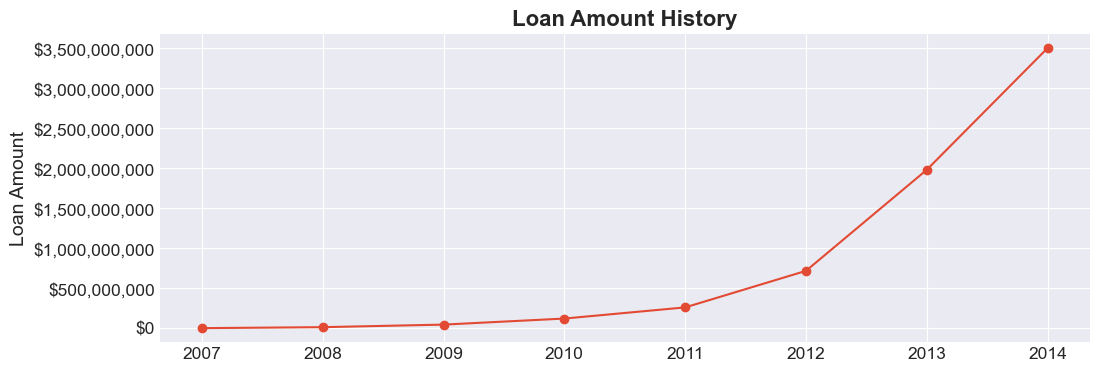

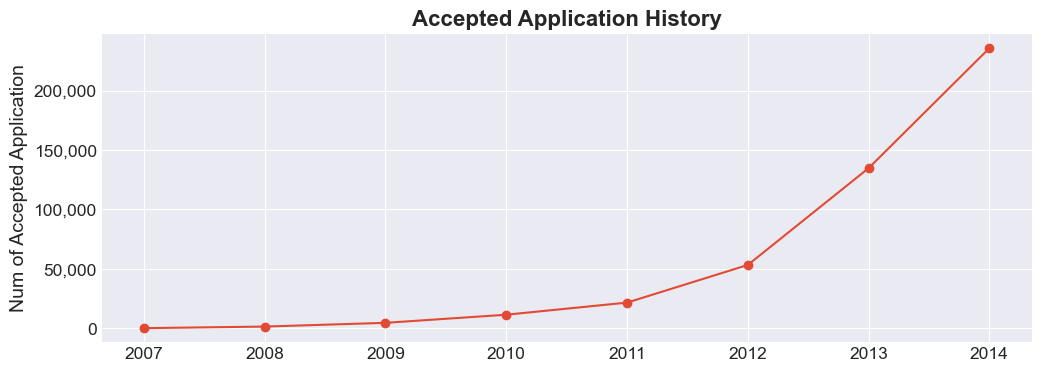

In [11]:
# extract year from issue_d
data2['issue_d_y'] = data2.issue_d.dt.year

# craete dummy values to facilitate the analysis process
data2['dummy'] = [1]*data2.shape[0]

plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12.5
plt.rcParams['ytick.labelsize'] = 12.5
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.titleweight'] = 'bold'
plt.style.use('seaborn-darkgrid')

data2.pivot_table(index='issue_d_y', values='loan_amnt', aggfunc='sum').\
  plot(marker='o', figsize=(12,4), title='Loan Amount History', legend=False)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick) 
plt.ylabel('Loan Amount')
plt.xlabel('')

data2.pivot_table(index='issue_d_y', values='dummy', aggfunc='count').\
  plot(marker='o', figsize=(12,4), title='Accepted Application History', legend=False)
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick) 
plt.ylabel('Num of Accepted Application')
plt.xlabel('')

d1 = data2.pivot_table(columns=['loan_status'], index='issue_d_y', values='loan_amnt', aggfunc='count')#.plot(figsize=(10,2.5))
fig1 = px.bar(d1, title='Growth Status of Loan Borrower', 
)
fig1.update_layout(
  yaxis_title='Number of Borrower', 
  xaxis_title='',
  legend_title='Loan Status',
  title_x=.5,
  title_y=.85,
  font_size=16,
)
fig1.show()

d2 = data2.pivot_table(columns=['loan_status'], index='issue_d_y', values='loan_amnt', aggfunc='sum')#.plot(figsize=(10,2.5))
fig2 = px.bar(d2, title='Growth Amount of Borrowed Money', 
)
fig2.update_layout(
  yaxis_title='USD ($)', 
  xaxis_title='',
  legend_title='Loan Status',
  title_x=.5,
  title_y=.85,
  font_size=16,
)
fig2.show()

data2.pivot_table(columns=['loan_status'], index='issue_d_y', values='loan_amnt', aggfunc='mean').sum(axis=1)

### BU 2  

Unpaid Funds

at the risk of fail to pay   -110,351,007.91
fail to pay                    -8,760,174.58
dtype: float64

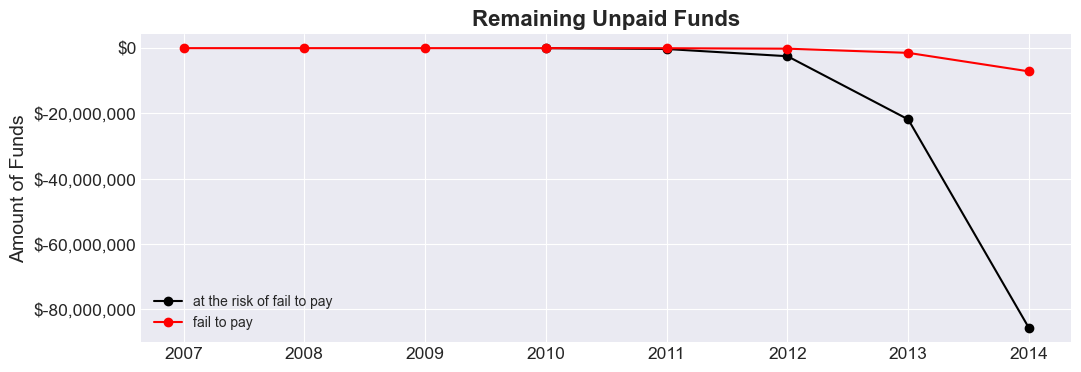

In [12]:
d3 = data2[(data2.loan_status=='3. Late') | (data2.loan_status=='4. Bad')]\
          [['out_prncp', 'issue_d_y', 'loan_status']].copy()#[['loan_status']].value_counts()
d3 = d3.pivot_table(index='issue_d_y', columns='loan_status', values='out_prncp', aggfunc='sum')*-1
d3.columns = ['at the risk of fail to pay','fail to pay']
d3.plot(marker='o', figsize=(12,4), title='Remaining Unpaid Funds', color=['k', 'r'])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick) 
plt.ylabel('Amount of Funds')
plt.xlabel('')
d3.sum(axis=0)

### BU 3  

Available grading from company

In [13]:
# proportion of each grade
grade_ratio = (data2.groupby(['grade']).agg('sum')[['dummy']].unstack()/data2.shape[0]).reset_index()
fig2 = px.pie(grade_ratio, 
             values=0,  names='grade', 
             title='Proportion of Grade',
             )
fig2.update_traces(sort=False)#,layout=layout) 
fig2.update_layout(title_x=.5, title_y=.85,
                   font=dict(size=22), 
                   legend={'x': .9, 'y': 1},
                   )
fig2.show()


# proportion of loan status per class
grade_sum = data2.groupby(['grade','loan_status']).agg('sum')[['dummy']].unstack()
grade_sum.columns = grade_sum.columns.droplevel()
grade_prop = grade_sum.div(grade_sum.sum(axis=1), axis=0)
disc_col = ['#2CA02C','#1F77B4','#FF7F0E','#D62728']
fig1 = px.bar(grade_prop, title='Loan Status per Grade', 
color_discrete_sequence=disc_col)#color='T10')
fig1.update_layout(
  xaxis_title='Grade', yaxis_title='Proportion (%)', 
  yaxis_tickformat = ',.0%', legend_title='Loan Status',
  title_x=.5
)
fig1.show()

## EDA

### EDA 0  

Profit Checking

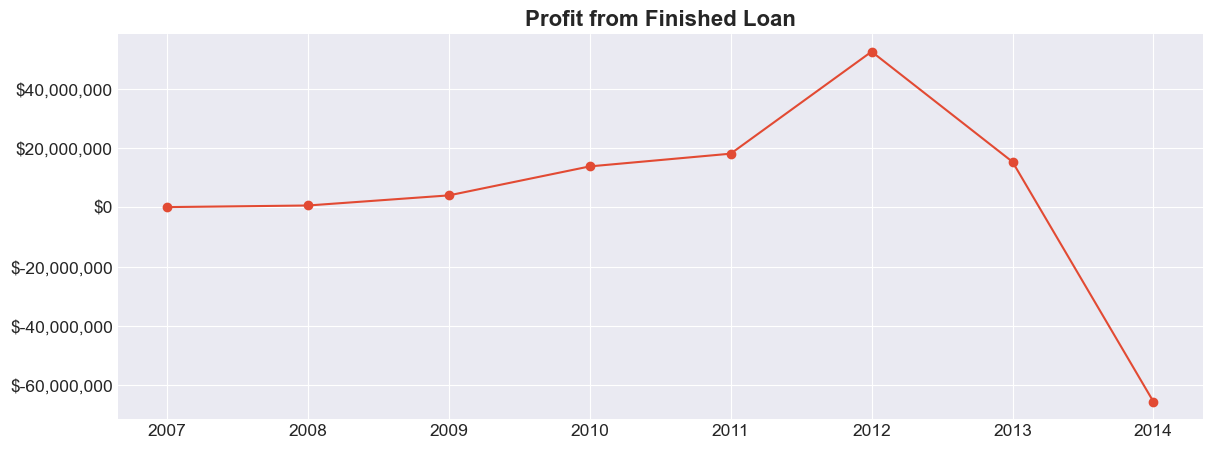

,out_prncp,total_pymnt,profit,ratio
issue_d_y,,,,
2007,0.00,"2,212,592.95","60,417.95",2.73
2008,0.00,"14,056,457.22","599,382.11",4.26
2009,0.00,"50,330,218.82","4,005,793.75",7.96
2010,267.78,"130,295,403.38","13,771,703.73",10.57
2011,"26,597.31","243,284,591.24","18,055,766.59",7.42
2012,"164,961.90","692,721,633.98","52,429,408.68",7.57
2013,"1,446,020.49","1,044,639,556.62","15,304,257.54",1.47
2014,"7,122,327.10","921,561,303.00","-65,475,921.80",-7.10


out_prncp         8,760,174.58
total_pymnt   3,099,101,757.22
profit           38,750,808.56
ratio                    34.87
dtype: float64

out_prncp       1,095,021.82
total_pymnt   387,387,719.65
profit          4,843,851.07
ratio                   4.36
dtype: float64

In [14]:
d_profit = data2[(data2.loan_status=='1. Good') |
                 (data2.loan_status=='4. Bad') ]\
                  .loc[:,['total_rec_int', 'total_rec_prncp', 
                        'total_rec_late_fee', 'recoveries',
                        'funded_amnt', 'out_prncp','total_pymnt','issue_d_y']].copy()
d_profit['profit'] = d_profit[['total_rec_int', 'total_rec_prncp', 
                               'total_rec_late_fee', 'recoveries']].sum(axis=1) - d_profit['funded_amnt']
d_profit = d_profit.groupby('issue_d_y', ).sum()[['out_prncp', 'total_pymnt', 'profit']]
d_profit['ratio'] = d_profit['profit']/d_profit['total_pymnt']*100
# Q: From finished loan, does profit has same increase with total_pymnt?
d_profit.profit.plot(figsize=(14,5), title='Profit from Finished Loan', marker='o', xlabel='')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick) 
plt.show()
display(d_profit)
display(d_profit.sum(axis=0))
d_profit.mean(axis=0)


### EDA 1

Distribution of Loan Amount

Text(0.5, 1.0, 'Loan Amount Distribution')

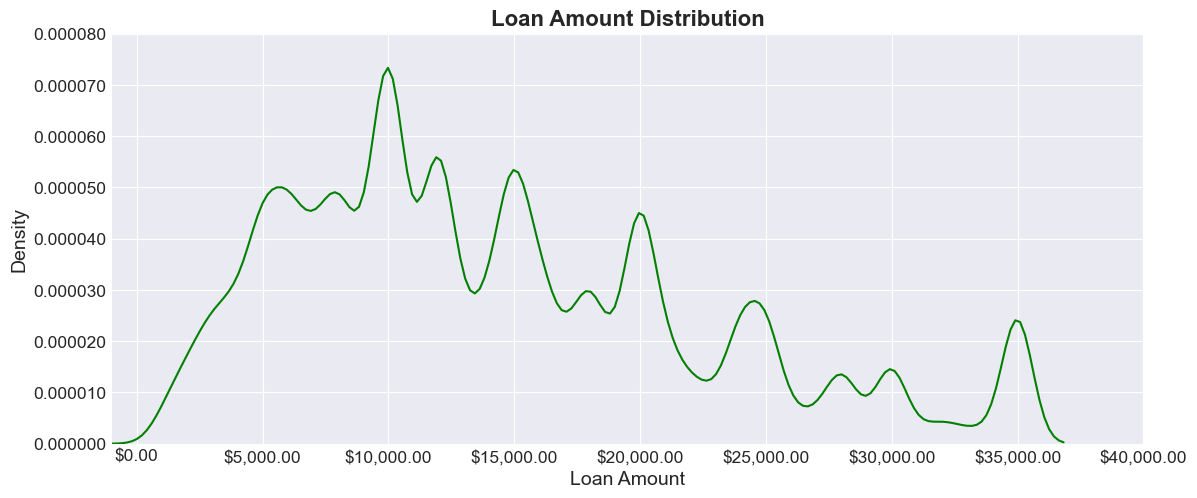

In [15]:
g0 = sns.displot(data=data2, x='loan_amnt',
            kind='kde',
            hue_order=sorted(data2.loan_status.unique()),
            aspect=2.2, color='g',
            legend=False
            )
xlabels = ['${:,.2f}'.format(x) for x in g0.ax.get_xticks()]
g0.set_xticklabels(xlabels)
ylabels = ['{:.6f}'.format(x) for x in g0.ax.get_yticks()]
g0.set_yticklabels(ylabels)
g0.ax.set_xlim(-1000,40000)
g0.ax.set_xlabel('Loan Amount')
plt.title('Loan Amount Distribution')

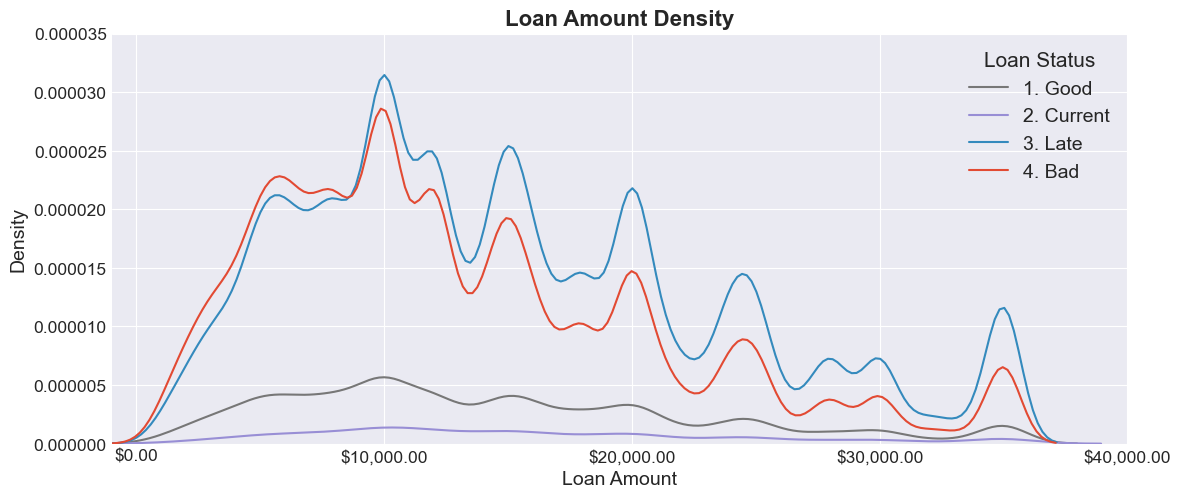

In [16]:
g1 = sns.displot(data=data2, x='loan_amnt',
            hue='loan_status', kind='kde',
            hue_order=sorted(data2.loan_status.unique()),
            aspect=2.2,
            legend=False
            )
xlabels = ['${:,.2f}'.format(x) for x in g1.ax.get_xticks()]
g1.set_xticklabels(xlabels)
ylabels = ['{:.6f}'.format(x) for x in g1.ax.get_yticks()]
g1.set_yticklabels(ylabels)
g1.ax.set_xlim(-1000,40000)
g1.ax.set_xlabel('Loan Amount')
plt.title('Loan Amount Density')
plt.legend(title='Loan Status', loc='upper right', 
           labels=['1. Good', '2. Current', '3. Late', '4. Bad'],
           fontsize=14, title_fontsize=15)

### EDA 2  

Check verification status proportion to loan status

loan_status,1. Good,2. Current,3. Late,4. Bad
verification_status,,,,
Not Verified,36.53,28.74,23.55,27.28
Source Verified,27.48,36.46,38.36,29.68
Verified,35.98,34.80,38.09,43.04


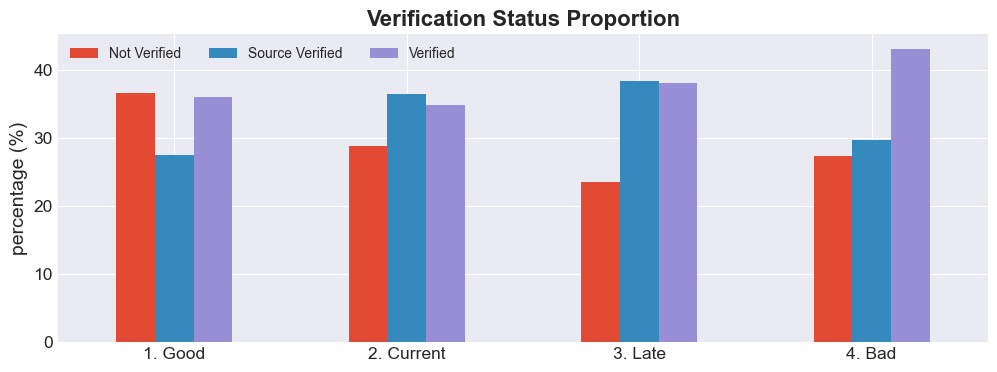

In [17]:
d5 = data2.pivot_table(columns='loan_status', index='verification_status', values='dummy', aggfunc='count') 
d5 = d5/d5.sum(axis=0)*100
d5.T.plot.bar(rot=0, figsize=(12,4), xlabel='')
plt.legend(loc=0, ncol=4)
plt.title('Verification Status Proportion')
plt.ylabel('percentage (%)')
d5

### EDA 3  

Annual Income Investigation of Loan Status

In [18]:
pd.options.display.float_format = '{:.4f}'.format
display(data2.annual_inc.describe(percentiles=[.01,.1,.25,.5,.75,.9,.99]))

d6 = data2[data2.annual_inc>data2.annual_inc.quantile(.99)][['annual_inc','loan_status']]
display(d6.loan_status.value_counts().sort_index() / d6.loan_status.value_counts().sum() * 100)
# display(d6.loan_status.value_counts().sort_index() / data2.loan_status.value_counts().sort_index() * 100)

d6_2 = data2[data2.annual_inc<data2.annual_inc.quantile(.01)][['annual_inc','loan_status']]
d6_2.loan_status.value_counts().sort_index() / d6_2.loan_status.value_counts().sum() * 100

count    463536.0000
mean      73288.3853
std       54871.7134
min        3000.0000
1%        18960.7000
10%       34000.0000
25%       45000.0000
50%       63000.0000
75%       89000.0000
90%      120000.0000
99%      242000.0000
max     7500000.0000
Name: annual_inc, dtype: float64

1. Good      37.9325
2. Current   54.3253
3. Late       2.1194
4. Bad        5.6228
Name: loan_status, dtype: float64

1. Good      40.0345
2. Current   43.1191
3. Late       2.5884
4. Bad       14.2580
Name: loan_status, dtype: float64

In [19]:
d6.groupby('loan_status').count()

,annual_inc
loan_status,
1. Good,1754
2. Current,2512
3. Late,98
4. Bad,260


In [20]:
d6.loan_status.value_counts().sum()#.sort_index()

4624

In [21]:
data2.annual_inc.describe(percentiles=[.01,.1,.25,.5,.75,.9,.99]).to_excel(f'{BASE_DIR}stats.xlsx')

Text(0.5, 0, 'Annual Income')

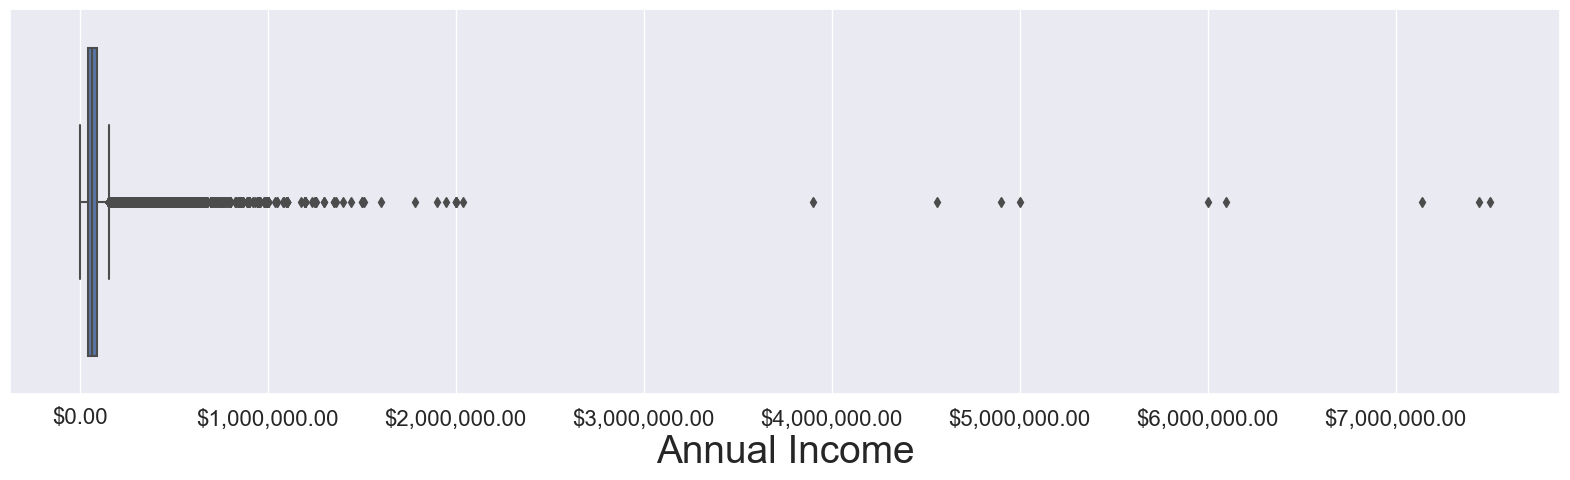

In [22]:
sns.set(rc = {'figure.figsize':(20,5),
              'font.size':32, 
              'axes.labelsize':28, 
              'xtick.labelsize':16,
              }
        )
g3 = sns.boxplot(data=data2, x='annual_inc', order=data2.loan_status.unique())#y='loan_status',
xlabels = ['${:,.2f}'.format(x) for x in g3.get_xticks()]
g3.set_xticklabels(xlabels)
g3.set_xlabel('Annual Income')

### EDA 4  

Check Top Purpose from Finished Loan Status

<AxesSubplot:title={'center':'Top 5 Purpose in Bad Status'}>

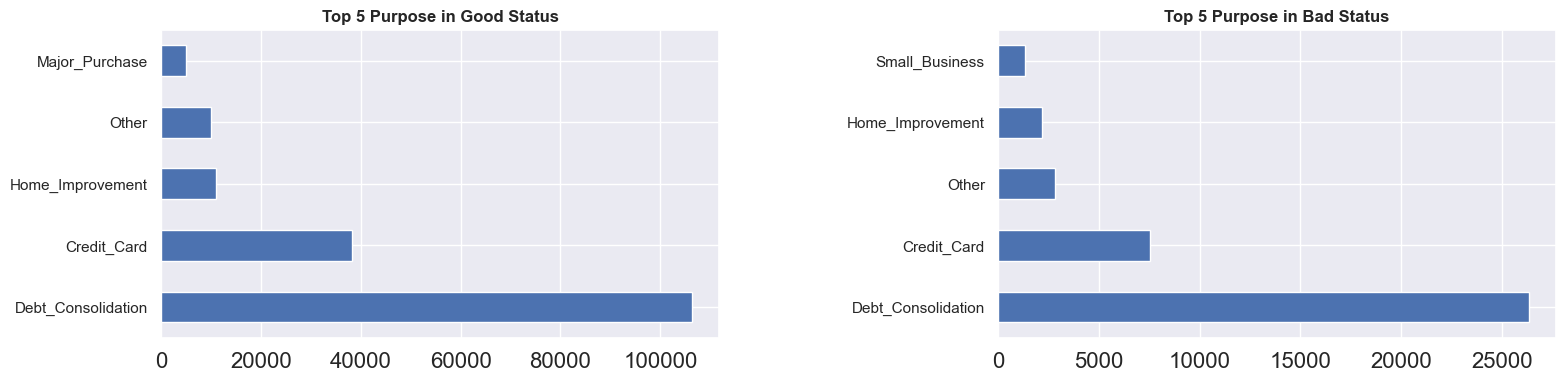

In [23]:
data2.purpose = data2.purpose.apply(lambda x: str(x).strip().title())
d7_1 = data2[data2.loan_status=='1. Good'].purpose.value_counts().nlargest(5)
# d7_2 = data2[data2.loan_status=='3. Late'].purpose.value_counts().nlargest(5)
d7_3 = data2[data2.loan_status=='4. Bad'].purpose.value_counts().nlargest(5)

plt.figure(figsize=(18,4))
plt.subplots_adjust(wspace=.5)
plt.subplot(1,2,1)
d7_1.plot.barh(title='Top 5 Purpose in Good Status')
# plt.subplot(1,3,2)
# d7_2.plot.barh(title='Top 5 Purpose in Late Status')
plt.subplot(1,2,2)
d7_3.plot.barh(title='Top 5 Purpose in Bad Status')

# Modelling

## Lib Prep.

In [24]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

## Data Prep.

In [25]:
# drop dummy feature
data2.drop(columns='dummy', inplace=True)

In [26]:
# filter class for modelling
data2_ = data2[data2.loan_status != '2. Current'].copy()

# filter data for input scoring
data2_ = data2_[[
  'loan_status',
  'purpose',
  'dti',
  'emp_length',
  'int_rate',
  # 'grade',
  # 'sub_grade',
  'pub_rec',
  'revol_util',
  'home_ownership',
  'initial_list_status',
  'emp_title',
  'loan_amnt',
  'title',
  'installment',
  'delinq_2yrs',
  'acc_now_delinq',
  'inq_last_6mths',
  'mths_since_last_delinq',
  'mths_since_last_record',
  'open_acc',
  'term',
  'annual_inc',
  'addr_state',
  'mths_since_last_major_derog',
  'collections_12_mths_ex_med',
  'tot_coll_amt',
  'verification_status',
]]

# fill missing value
data2_.select_dtypes('object').fillna('', inplace=True)

# simple fixing string value
for col in data2_.select_dtypes('object').columns:
  data2_[col] = data2_[col].apply(lambda x: str(x).strip().title())

# one hot encoding class
enc_class = pd.get_dummies(data2_['loan_status'])
data2_1 = data2_.copy()
data2_1.drop(columns='loan_status', inplace=True)
data2_2 = pd.concat([data2_1, enc_class], axis=1)

# purpose & emp title fixing
top_title = data2_2.title.value_counts().nlargest(10).index.to_list()
data2_2.loc[~data2_2['title'].isin(top_title), 'title'] = 'Other'
top_emp_title = data2_2.emp_title.value_counts().nlargest(30).index.to_list()
data2_2.loc[~data2_2['emp_title'].isin(top_emp_title), 'emp_title'] = 'Other'

# one date col fixing / drop

# enc X
enc_data = pd.get_dummies(data2_2.select_dtypes('object'))
enc_data

data2_3 = data2_2.copy()

# combine data
data2_3['Reject_Application'] = data2_3['4. Bad']#+data2_3['3. Late']
data2_3.drop(['1. Good', '3. Late','4. Bad'],axis=1,inplace=True)
# data2_3.rename(columns={'1. Good': 'Accept_Application'}, inplace=True)

# drop original object col before replace with encoding
data2_3.drop(columns=data2_3.select_dtypes('object').columns, inplace=True)

# combine with enc values
data2_3 = pd.concat([enc_data, data2_3], axis=1)

data2_3

,purpose_Car,purpose_Credit_Card,purpose_Debt_Consolidation,purpose_Educational,purpose_Home_Improvement,purpose_House,purpose_Major_Purchase,purpose_Medical,purpose_Moving,purpose_Other,...,acc_now_delinq,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,annual_inc,mths_since_last_major_derog,collections_12_mths_ex_med,tot_coll_amt,Reject_Application
0,0,1,0,0,0,0,0,0,0,0,...,0.0000,1.0000,NaN,NaN,3.0000,24000.0000,NaN,0.0000,NaN,0
1,1,0,0,0,0,0,0,0,0,0,...,0.0000,5.0000,NaN,NaN,3.0000,30000.0000,NaN,0.0000,NaN,1
2,0,0,0,0,0,0,0,0,0,0,...,0.0000,2.0000,NaN,NaN,2.0000,12252.0000,NaN,0.0000,NaN,0
3,0,0,0,0,0,0,0,0,0,1,...,0.0000,1.0000,35.0000,NaN,10.0000,49200.0000,NaN,0.0000,NaN,0
5,0,0,0,0,0,0,0,0,0,0,...,0.0000,3.0000,NaN,NaN,9.0000,36000.0000,NaN,0.0000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,0,0,0,0,0,0,0,1,0,0,...,0.0000,0.0000,3.0000,NaN,12.0000,37536.0000,4.0000,0.0000,0.0000,1
466277,0,0,1,0,0,0,0,0,0,0,...,0.0000,0.0000,14.0000,NaN,16.0000,90000.0000,14.0000,0.0000,0.0000,1
466278,0,0,0,0,0,0,0,0,0,0,...,0.0000,0.0000,29.0000,NaN,9.0000,42000.0000,32.0000,0.0000,0.0000,0
466281,0,0,1,0,0,0,0,0,0,0,...,0.0000,5.0000,NaN,116.0000,18.0000,78000.0000,NaN,0.0000,0.0000,1


In [27]:
data2_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239310 entries, 0 to 466283
Columns: 147 entries, purpose_Car to Reject_Application
dtypes: float64(15), int64(1), uint8(131)
memory usage: 60.9 MB


In [28]:
# check if there is high linear correlation to class 
data2_3_c = pd.DataFrame(data2_3.corr().iloc[:-1,-1:])
cols = data2_3_c[(data2_3_c.Reject_Application>.1) | (data2_3_c.Reject_Application<-.1)].sort_values('Reject_Application', ascending=False).index
data2_3_c[(data2_3_c.Reject_Application>.1) | (data2_3_c.Reject_Application<-.1)].sort_values('Reject_Application', ascending=False)

,Reject_Application
int_rate,0.2268
term_60 Months,0.1491
dti,0.1063
term_36 Months,-0.1491


In [29]:
# define data for modelling
data_clean = data2_3.copy()

# handling missing value
data_clean.select_dtypes('float').fillna(0,inplace=True)
print(f'Missing Value: {data_clean.isnull().sum().sum()} record(s)')

# scaling data
scl = StandardScaler()
data_clean[data_clean.select_dtypes('float').columns] = scl.fit_transform(data_clean.select_dtypes('float'))
data_clean

Missing Value: 0 record(s)


,purpose_Car,purpose_Credit_Card,purpose_Debt_Consolidation,purpose_Educational,purpose_Home_Improvement,purpose_House,purpose_Major_Purchase,purpose_Medical,purpose_Moving,purpose_Other,...,acc_now_delinq,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,annual_inc,mths_since_last_major_derog,collections_12_mths_ex_med,tot_coll_amt,Reject_Application
0,0,1,0,0,0,0,0,0,0,0,...,-0.0497,0.1221,-0.6826,-0.3396,-1.6330,-0.8737,-0.4120,-0.0720,-0.0079,0
1,1,0,0,0,0,0,0,0,0,0,...,-0.0497,3.8374,-0.6826,-0.3396,-1.6330,-0.7644,-0.4120,-0.0720,-0.0079,1
2,0,0,0,0,0,0,0,0,0,0,...,-0.0497,1.0509,-0.6826,-0.3396,-1.8402,-1.0877,-0.4120,-0.0720,-0.0079,0
3,0,0,0,0,0,0,0,0,0,1,...,-0.0497,0.1221,0.8656,-0.3396,-0.1821,-0.4146,-0.4120,-0.0720,-0.0079,0
5,0,0,0,0,0,0,0,0,0,0,...,-0.0497,1.9797,-0.6826,-0.3396,-0.3894,-0.6551,-0.4120,-0.0720,-0.0079,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,0,0,0,0,0,0,0,1,0,0,...,-0.0497,-0.8068,-0.5499,-0.3396,0.2324,-0.6271,-0.2005,-0.0720,-0.0079,1
466277,0,0,1,0,0,0,0,0,0,0,...,-0.0497,-0.8068,-0.0633,-0.3396,1.0615,0.3286,0.3283,-0.0720,-0.0079,1
466278,0,0,0,0,0,0,0,0,0,0,...,-0.0497,-0.8068,0.6002,-0.3396,-0.3894,-0.5458,1.2800,-0.0720,-0.0079,0
466281,0,0,1,0,0,0,0,0,0,0,...,-0.0497,3.8374,-0.6826,3.9668,1.4760,0.1100,-0.4120,-0.0720,-0.0079,1


## Main Part

In [37]:
# choose random state for more stable results (and further tuning if needed)
rs = 42


# define predictor and class
Y = data_clean[data_clean.columns[-1]].copy().values
X = data_clean.iloc[:,:-1].copy()


# splitting
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    random_state=rs, 
                                                    stratify=Y, 
                                                    test_size=.2)


# create baseline data for comparison
data_baseline = data2.loc[x_test.index,['total_rec_int', 'total_rec_prncp', 
                                        'total_rec_late_fee', 'recoveries',
                                        'funded_amnt', 'out_prncp','total_pymnt']].copy()
data_baseline['profit'] = data_baseline[['total_rec_int', 'total_rec_prncp', 
                                         'total_rec_late_fee', 'recoveries']]\
                                        .sum(axis=1) - data_baseline['funded_amnt']


# choose model
clfs = [
        LogisticRegression(random_state=rs), # beacuse simple and light model
        DecisionTreeClassifier(random_state=rs), # because good for non-parametric model
        RandomForestClassifier(random_state=rs), # because more robust for non-parametric model
        SGDClassifier(random_state=rs, penalty='l1'), # following from sklearn guide for choosing model (with large data)
        ]


# for customize metrics
def convert_to_profit(y_test, y_pred, data_baseline, show=False):

  # preparation for metric calculation (dynamic for each model)
  data_baseline_compare = data_baseline.copy()
  data_baseline_compare['Pred'] = y_pred
  data_baseline_compare['improved_profit'] = data_baseline_compare.apply(lambda x: x.profit if x.Pred==0 else 0, axis=1)
  
  # Main metrics calculation
  crnt_prft = data_baseline_compare.profit.sum()
  new_prft = data_baseline_compare.improved_profit.sum()
  impr_prft = new_prft-crnt_prft
  impr_prft_rti = (impr_prft)/abs(crnt_prft)*100
  
  # base ml metrics for classification
  cm = metrics.confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  
  # print result
  if show:
    print(f'\nProfit on Test Data: ${crnt_prft:,.2f}')
    print(f'Improved Profit: ${impr_prft:,.2f}')
    print(f'Increasing Profit: ${(impr_prft-crnt_prft):,.2f} ({impr_prft_rti:,.2f}%)\n')
    print(metrics.classification_report(y_test, y_pred))
    display(cm)
    print('=====================================================\n\n\n')
  return new_prft, impr_prft, impr_prft_rti, tn, fp, fn, tp


# to store individual results
res_0, res_1, res_2, res_3 = [], [], [], []
tn_all, fp_all, fn_all, tp_all = [], [], [], []
model_name = []


# modelling
for clf in clfs:

  # model preparation
  c1 = clf
  model_name += [type(c1).__name__]

  # train and predict
  t0 = time.time()
  c1.fit(x_train, y_train)
  t1 = time.time()
  res_0 += [t1-t0]
  print(c1)
  y_pred = c1.predict(x_test)
  
  # get metrics
  res1_, res2_, res3_, res4_, res5_, res6_, res7_ = convert_to_profit(y_test, y_pred, data_baseline, True)  
  res_1 += [res1_]
  res_2 += [res2_]
  res_3 += [res3_]
  tn_all += [res4_]
  fp_all += [res5_]
  fn_all += [res6_]
  tp_all += [res7_]

LogisticRegression(random_state=42)

Profit on Test Data: $-7,272,745.26
Improved Profit: $439,551.80
Increasing Profit: $7,712,297.06 (6.04%)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     39201
           1       0.40      0.00      0.01      8661

    accuracy                           0.82     47862
   macro avg       0.61      0.50      0.45     47862
weighted avg       0.74      0.82      0.74     47862



array([[39166,    35],
       [ 8638,    23]], dtype=int64)




DecisionTreeClassifier(random_state=42)

Profit on Test Data: $-7,272,745.26
Improved Profit: $7,403,667.09
Increasing Profit: $14,676,412.35 (101.80%)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     39201
           1       0.24      0.25      0.25      8661

    accuracy                           0.72     47862
   macro avg       0.54      0.54      0.54     47862
weighted avg       0.73      0.72      0.72     47862



array([[32195,  7006],
       [ 6454,  2207]], dtype=int64)




RandomForestClassifier(random_state=42)

Profit on Test Data: $-7,272,745.26
Improved Profit: $1,218,802.62
Increasing Profit: $8,491,547.88 (16.76%)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     39201
           1       0.47      0.02      0.03      8661

    accuracy                           0.82     47862
   macro avg       0.65      0.51      0.47     47862
weighted avg       0.76      0.82      0.74     47862



array([[39032,   169],
       [ 8509,   152]], dtype=int64)




SGDClassifier(penalty='l1', random_state=42)

Profit on Test Data: $-7,272,745.26
Improved Profit: $19,596,878.48
Increasing Profit: $26,869,623.73 (269.46%)

              precision    recall  f1-score   support

           0       0.88      0.72      0.79     39201
           1       0.30      0.55      0.39      8661

    accuracy                           0.69     47862
   macro avg       0.59      0.63      0.59     47862
weighted avg       0.77      0.69      0.72     47862



array([[28194, 11007],
       [ 3905,  4756]], dtype=int64)

## Result

In [38]:
data_result = pd.DataFrame(
  {
    'model_name': model_name,
    'training_time': res_0,
    'new_profit': res_1,
    'profit_margin': res_2,
    'improved_profit_ratio': res_3,
    'tn': tn_all,
    'fp': fp_all, 
    'fn': fn_all, 
    'tp': tp_all
  }
)
data_result.sort_values('profit_margin', inplace=True, ascending=False)
data_result

,model_name,training_time,new_profit,profit_margin,improved_profit_ratio,tn,fp,fn,tp
3,SGDClassifier,43.4506,12324133.2160,19596878.4753,269.4564,28194,11007,3905,4756
1,DecisionTreeClassifier,9.6972,130921.8338,7403667.0930,101.8002,32195,7006,6454,2207
2,RandomForestClassifier,68.8630,-6053942.6432,1218802.6160,16.7585,39032,169,8509,152
0,LogisticRegression,2.3557,-6833193.4592,439551.8000,6.0438,39166,35,8638,23


In [39]:
data_result['accuracy'] = ( data_result.tp + data_result.tn) \
                          /( data_result.tp + data_result.tn\
                             + data_result.fn + data_result.fp)*100
data_result['precision'] = data_result.tp / (data_result.tp + data_result.fp)*100
data_result['recall'] = data_result.tp / (data_result.tp + data_result.fn)*100
data_result['f1_score']  = 2 * data_result.precision * data_result.recall\
                           / (data_result.precision + data_result.recall)
data_result.reset_index(inplace=True)
data_result.drop(columns='index', inplace=True)
data_result

,model_name,training_time,new_profit,profit_margin,improved_profit_ratio,tn,fp,fn,tp,accuracy,precision,recall,f1_score
0,SGDClassifier,43.4506,12324133.2160,19596878.4753,269.4564,28194,11007,3905,4756,68.8438,30.1719,54.9128,38.9453
1,DecisionTreeClassifier,9.6972,130921.8338,7403667.0930,101.8002,32195,7006,6454,2207,71.8775,23.9553,25.4820,24.6951
2,RandomForestClassifier,68.8630,-6053942.6432,1218802.6160,16.7585,39032,169,8509,152,81.8687,47.3520,1.7550,3.3845
3,LogisticRegression,2.3557,-6833193.4592,439551.8000,6.0438,39166,35,8638,23,81.8792,39.6552,0.2656,0.5276


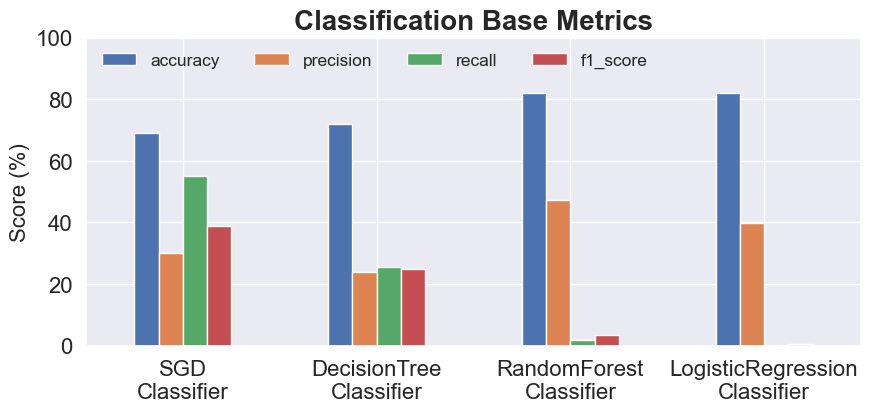

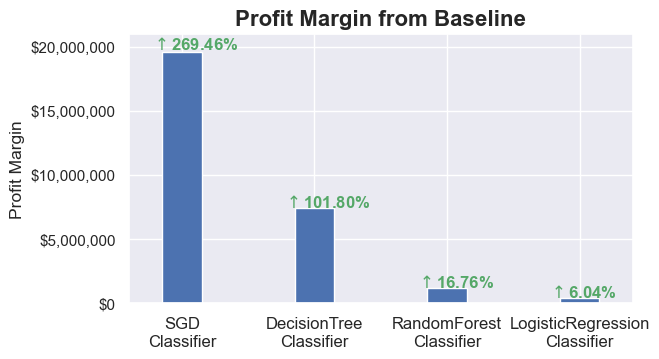

In [40]:
xlbl_name = [s.split('Classifier')[0]+'\nClassifier' for s in data_result.model_name]

# base metric
ax = data_result[['model_name','accuracy','precision','recall','f1_score']]\
                .plot(kind='bar', ylim=(0,100), figsize=(10,4))
ax.set_xticklabels(xlbl_name, rotation=0)
ax.set_title('Classification Base Metrics', size=20)
ax.set_ylabel('Score (%)', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(loc='upper left', fontsize=12.5, ncol=4)

# profit
ax = data_result[['model_name','profit_margin',]].plot(kind='bar', figsize=(6.5,3.5),width=.3, legend=False)
ax.set_xticklabels(xlbl_name, rotation=0, fontsize=12)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.set_ylim(0,21000000)
ax.set_title('Profit Margin from Baseline', size=16)
ax.set_ylabel('Profit Margin', size=12.5)
for j,i in enumerate(ax.patches):  
  y_h = i.get_height()*1.01
  prf_rti = data_result.loc[j,"improved_profit_ratio"]
  rti_sign = r'$\uparrow$'
  c = 'g'
  if prf_rti<0:
    rti_sign = r'$\downarrow$'
    c = 'r'
  ax.text(i.get_x()-.085, y_h,
          f'{rti_sign}{prf_rti:,.2f}%', 
          fontsize=12, color=c, fontweight='bold') 